## <center>Capstone Project : Cyber Security</center>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectPercentile, f_classif

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
data = data.drop('index', axis=1)

#### Data Exploration

In [4]:
print("Data Shape:", data.shape)
print("Missing Values:\n", data.isnull().sum())
print("Unique Values per Column:\n", data.nunique(axis=0))
print("Target Value Counts:\n", data['Result'].value_counts())
print("Data Summary Statistics:\n", data.describe())

Data Shape: (11055, 31)
Missing Values:
 having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
St

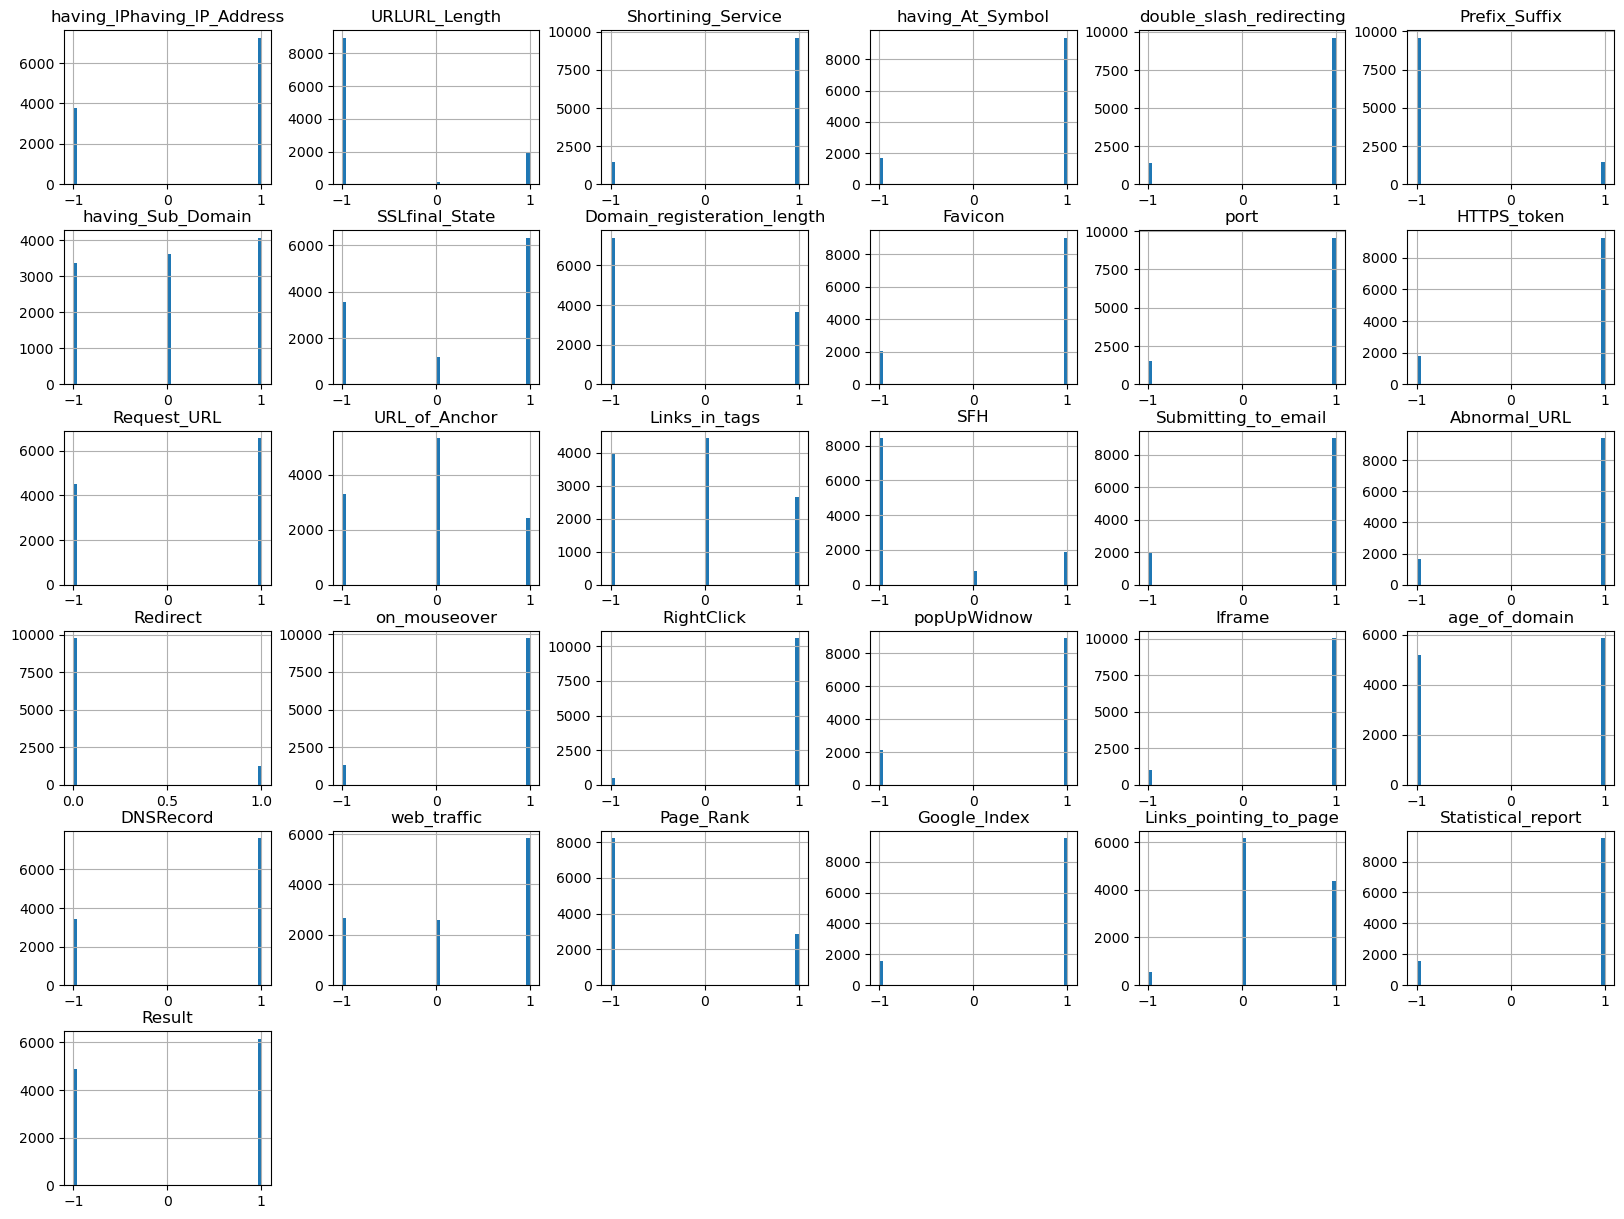

In [5]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

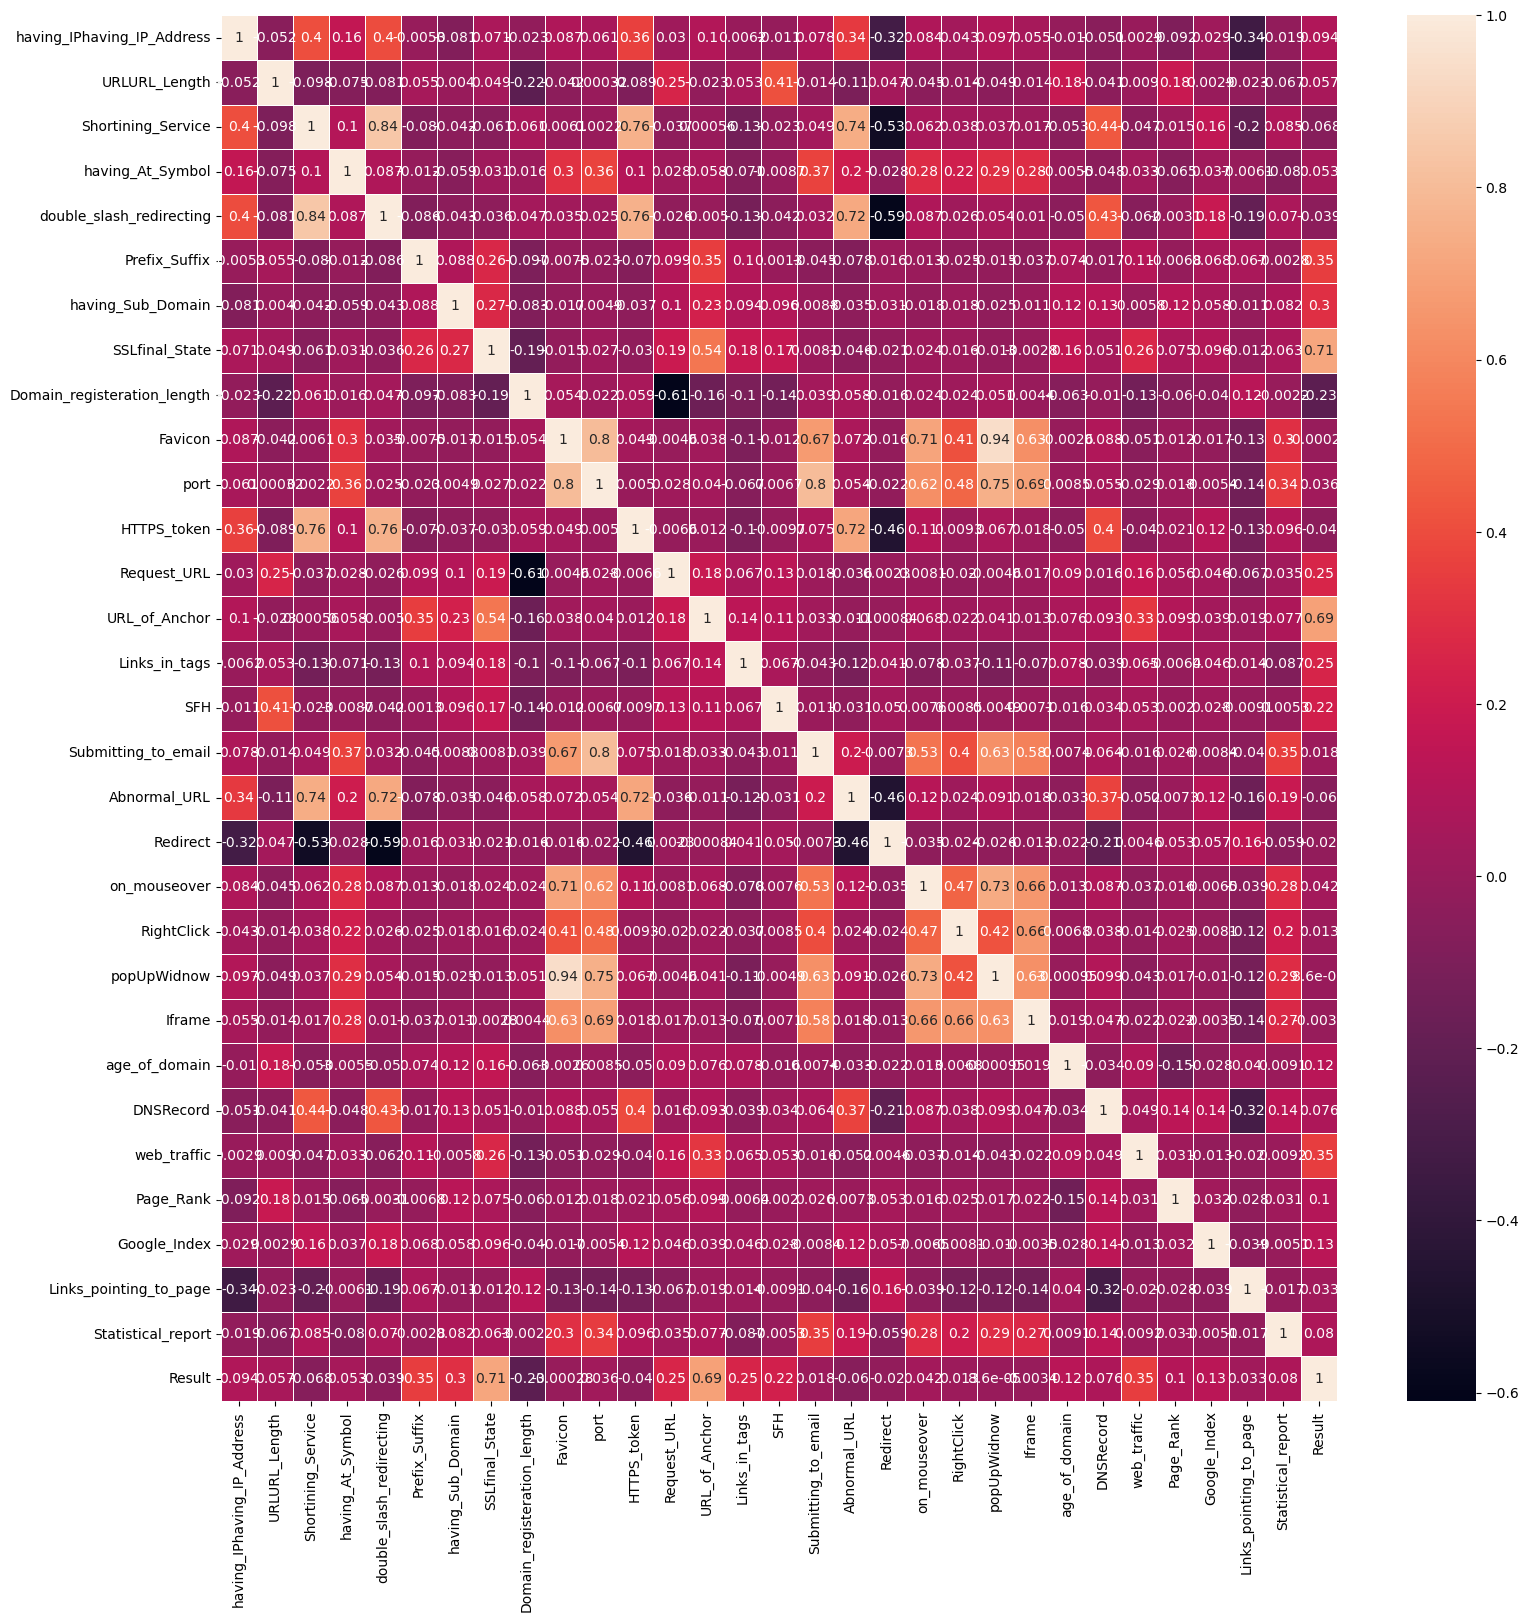

In [6]:
plt.figure(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5)
plt.show()

#### Feature Selection

In [7]:
sf = SelectPercentile(score_func=f_classif, percentile=75)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_selected = sf.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

#### Model Training and Evaluation

In [8]:
def model_build(model_name, x_train, y_train, x_test, y_test):
    if model_name == 'LogisticRegression':
        model = LogisticRegression()
    elif model_name == 'KNeighborsClassifier':
        model = KNeighborsClassifier(n_neighbors=4)
    elif model_name == 'RandomForestClassifier':
        model = RandomForestClassifier()
    else:
        print('Not a valid model name')
        return None, None

    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
   
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.4f}")
    
    print("Classification Report: ")
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(6, 5))
    con_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(x_test)[:, 1]
        
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        plt.figure(figsize=(6, 5))
        plt.plot(recall, precision, label=f'{model_name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()
        plt.show()
        
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    
    
    return model, acc

#### Logistic Regression

LogisticRegression Accuracy: 0.9254
Classification Report: 
              precision    recall  f1-score   support

          -1       0.94      0.89      0.91       979
           1       0.92      0.95      0.93      1232

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.92      2211
weighted avg       0.93      0.93      0.93      2211



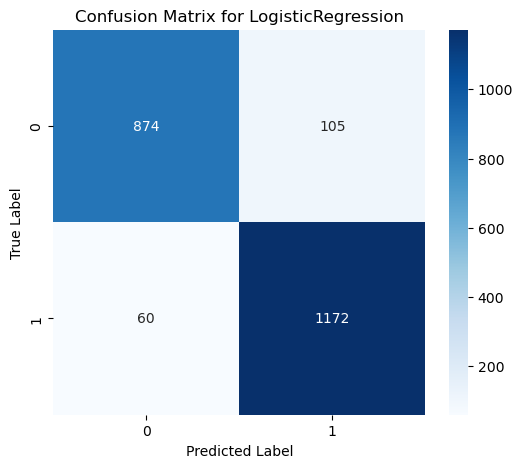

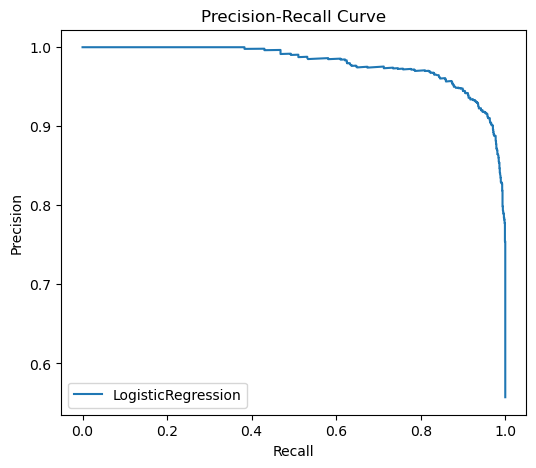

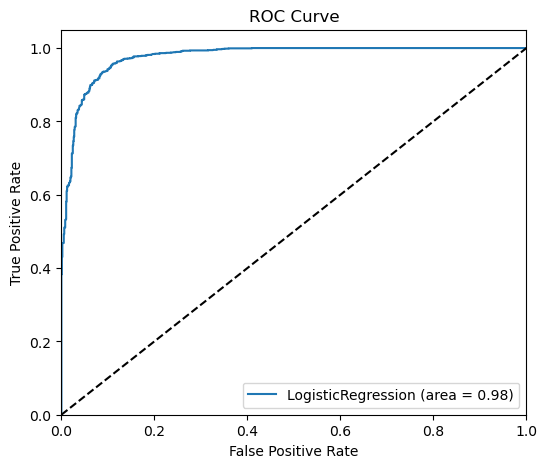

In [9]:
lg_model, acc1 = model_build('LogisticRegression', X_train, y_train, X_test, y_test)

#### KNeighbors Classifier

KNeighborsClassifier Accuracy: 0.9435
Classification Report: 
              precision    recall  f1-score   support

          -1       0.92      0.96      0.94       979
           1       0.97      0.93      0.95      1232

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



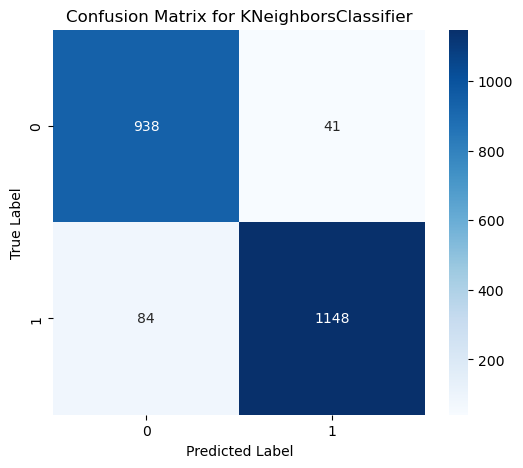

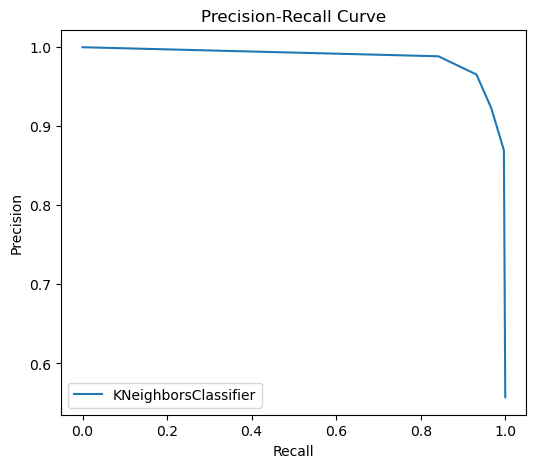

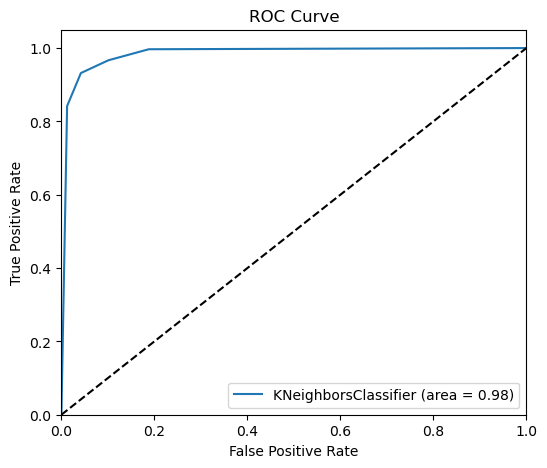

In [10]:
knn_model, acc2 = model_build('KNeighborsClassifier', X_train, y_train, X_test, y_test)

#### RandomForest Classifier

RandomForestClassifier Accuracy: 0.9688
Classification Report: 
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       979
           1       0.96      0.98      0.97      1232

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



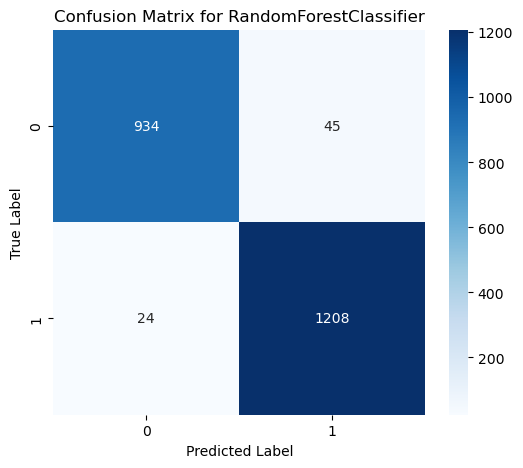

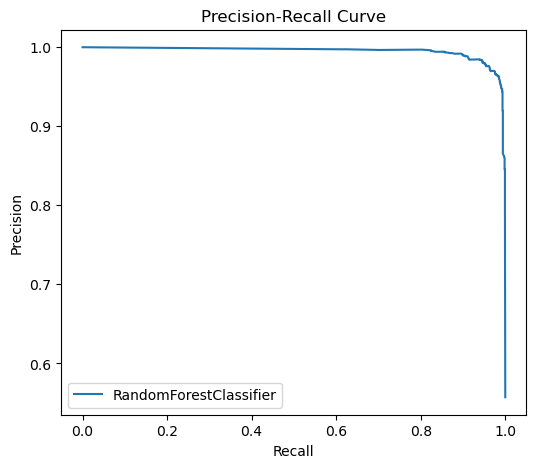

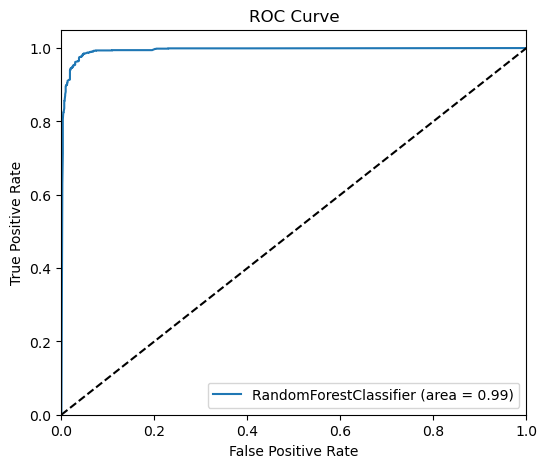

In [11]:
rf_mode, acc3 = model_build('RandomForestClassifier', X_train, y_train, X_test, y_test)

#### Summary

In [12]:
results=pd.DataFrame({'Model':['LogisticRegression','KNN','RandomForestClassifier'],
                     'Accuracy Score':[acc1,acc2,acc3]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Accuracy Score
Model,
RandomForestClassifier,0.968792
KNN,0.943464
LogisticRegression,0.925373
